# 1. Download dependencies we need to explore the data for the project

In [1]:
import pandas as pd
from sklearn import datasets

In [2]:
pip install pgeocode

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Note: you may need to restart the kernel to use updated packages.


# 2. Scrape Mexican postal codes of the most important boroughs in Mexico City from https://micodigopostal.org into panda dataframes

In [3]:
url1='https://micodigopostal.org/ciudad-de-mexico/cuajimalpa-de-morelos/'
url2='https://micodigopostal.org/ciudad-de-mexico/cuauhtemoc/'
url3='https://micodigopostal.org/ciudad-de-mexico/coyoacan/'
url4='https://micodigopostal.org/ciudad-de-mexico/benito-juarez/'
url5='https://micodigopostal.org/ciudad-de-mexico/alvaro-obregon/'
url6='https://micodigopostal.org/ciudad-de-mexico/miguel-hidalgo/'
url7='https://micodigopostal.org/ciudad-de-mexico/xochimilco/'

df_cuajimalpa=pd.read_html(url1, header=0)[0]
df_cuahtemoc=pd.read_html(url2, header=0)[0]
df_coyoacan=pd.read_html(url3, header=0)[0]
df_BenitoJuarez=pd.read_html(url4, header=0)[0]
df_alvaroobregon=pd.read_html(url5, header=0)[0]
df_MiguelHidalgo=pd.read_html(url6, header=0)[0]
df_xochimilco=pd.read_html(url7, header=0)[0]

df_xochimilco.head(5)

Asentamiento▼  \
0                                                 18   
1                                          3 de Mayo   
2                                           Ahualapa   
3                                Ampliación La Noria   
4  (adsbygoogle = window.adsbygoogle || []).push(...   

                                Tipo de Asentamiento  \
0                                             Barrio   
1                                             Barrio   
2                                             Barrio   
3                                            Colonia   
4  (adsbygoogle = window.adsbygoogle || []).push(...   

                                       Código Postal  \
0                                              16034   
1                                              16606   
2                                              16533   
3                                              16030   
4  (adsbygoogle = window.adsbygoogle || []).push(...   

                                           Municipio  \
0                                         Xochimilco   
1                                         Xochimilco   
2                                         Xochimilco   
3                                         Xochimilco   
4  (adsbygoogle = window.adsbygoogle || []).push(...   

                                              Ciudad  \
0                                   Ciudad de México   
1                                   Ciudad de México   
2                                   Ciudad de México   
3                                   Ciudad de México   
4  (adsbygoogle = window.adsbygoogle || []).push(...   

                                                Zona  \
0                                             Urbana   
1                                             Urbana   
2                                             Urbana   
3                                             Urbana   
4  (adsbygoogle = window.adsbygoogle || []).push(...   

                                                Mapa  
0                                               Mapa  
1                                               Mapa  
2                                               Mapa  
3                                               Mapa  
4  (adsbygoogle = window.adsbygoogle || []).push(...

# 3. Removing the row #4 from all data frames that contains images from website

In [4]:
df_cuajimalpa=df_cuajimalpa.drop([4])
df_cuahtemoc=df_cuahtemoc.drop([4])
df_coyoacan=df_coyoacan.drop([4])
df_BenitoJuarez=df_BenitoJuarez.drop([4])
df_alvaroobregon=df_alvaroobregon.drop([4])
df_MiguelHidalgo=df_MiguelHidalgo.drop([4])
df_xochimilco=df_xochimilco.drop([4])

df_xochimilco 

Asentamiento▼ Tipo de Asentamiento Código Postal   Municipio  \
0                      18               Barrio         16034  Xochimilco   
1               3 de Mayo               Barrio         16606  Xochimilco   
2                Ahualapa               Barrio         16533  Xochimilco   
3     Ampliación La Noria              Colonia         16030  Xochimilco   
5    Ampliación Nativitas              Colonia         16459  Xochimilco   
..                    ...                  ...           ...         ...   
104                Texmic              Colonia         16340  Xochimilco   
105          Tierra Nueva              Colonia         16050  Xochimilco   
106  Valle de Santa María              Colonia         16550  Xochimilco   
107              Xaltocan               Barrio         16090  Xochimilco   
108            Xochipilli              Colonia         16430  Xochimilco   

               Ciudad    Zona  Mapa  
0    Ciudad de México  Urbana  Mapa  
1    Ciudad de México  Urbana  Mapa  
2    Ciudad de México  Urbana  Mapa  
3    Ciudad de México  Urbana  Mapa  
5    Ciudad de México  Urbana  Mapa  
..                ...     ...   ...  
104  Ciudad de México  Urbana  Mapa  
105  Ciudad de México  Urbana  Mapa  
106  Ciudad de México  Urbana  Mapa  
107  Ciudad de México  Urbana  Mapa  
108  Ciudad de México  Urbana  Mapa  

[108 rows x 7 columns]

# 4. Download pgeocode, a python library that gets GPS coordinates, region name and municipality name from postal codes

In [5]:
import pgeocode


In [6]:
cuajimalpa = df_cuajimalpa['Código Postal']
cuahtemoc = df_cuahtemoc['Código Postal']
coyoacan = df_coyoacan['Código Postal'] 
BenitoJuarez = df_BenitoJuarez['Código Postal']
alvaroobregon = df_alvaroobregon['Código Postal']
MiguelHidalgo = df_MiguelHidalgo['Código Postal']
xochimilco = df_xochimilco['Código Postal']

cuajimalpa_str = []
cuahtemoc_str = []
coyoacan_str = []
BenitoJuarez_str = []
alvaroobregon_str = []
MiguelHidalgo_str = []
xochimilco_str = []

for n in cuajimalpa:
    cuajimalpa_str.append(str(n))
    
for n in cuahtemoc:
    cuahtemoc_str.append(str(n))
    
for n in coyoacan:
    coyoacan_str.append(str(n))

for n in BenitoJuarez:
    BenitoJuarez_str.append(str(n))
    
for n in alvaroobregon:
    alvaroobregon_str.append(str(n))
    
for n in MiguelHidalgo:
    MiguelHidalgo_str.append(str(n))
    
for n in xochimilco:
    xochimilco_str.append(str(n))

nomi = pgeocode.Nominatim('MX')
nomi.query_postal_code(cuajimalpa_str)
nomi.query_postal_code(cuahtemoc_str)
nomi.query_postal_code(coyoacan_str)
nomi.query_postal_code(BenitoJuarez_str)
nomi.query_postal_code(alvaroobregon_str)
nomi.query_postal_code(MiguelHidalgo_str)
nomi.query_postal_code(xochimilco_str)

cuajimalpa_coord=nomi.query_postal_code(cuajimalpa_str)
cuauhtemoc_coord=nomi.query_postal_code(cuahtemoc_str)
coyoacan_coord=nomi.query_postal_code(coyoacan_str)
BenitoJuarez_coord=nomi.query_postal_code(BenitoJuarez_str)
alvaroobregon_coord=nomi.query_postal_code(alvaroobregon_str)
MiguelHidalgo_coord=nomi.query_postal_code(MiguelHidalgo_str)
xochimilco_coord=nomi.query_postal_code(xochimilco_str)
xochimilco_coord

postal_code country_code  \
0         16034           MX   
1         16606           MX   
2         16533           MX   
3         16030           MX   
4         16459           MX   
..          ...          ...   
103       16340           MX   
104       16050           MX   
105       16550           MX   
106       16090           MX   
107       16430           MX   

                                            place_name        state_name  \
0                                            Barrio 18  Distrito Federal   
1                                     Barrio 3 de Mayo  Distrito Federal   
2                                      Barrio Ahualapa  Distrito Federal   
3    División del Norte INFONAVIT, La Noria, Potrer...  Distrito Federal   
4                                 Ampliación Nativitas  Distrito Federal   
..                                                 ...               ...   
103                                             Texmic  Distrito Federal   
104  Barrio San Marcos, Jardines del Sur, Tierra Nueva  Distrito Federal   
105                    Tototitla, Valle de Santa María  Distrito Federal   
106  Caltongo, Barrio Xaltocan, Barrio San Pedro, T...  Distrito Federal   
107                                         Xochipilli  Distrito Federal   

     state_code county_name  county_code    community_name  community_code  \
0             9  Xochimilco           13  Ciudad de México            16.0   
1             9  Xochimilco           13  Ciudad de México            16.0   
2             9  Xochimilco           13  Ciudad de México            16.0   
3             9  Xochimilco           13  Ciudad de México            16.0   
4             9  Xochimilco           13  Ciudad de México            16.0   
..          ...         ...          ...               ...             ...   
103           9  Xochimilco           13  Ciudad de México            16.0   
104           9  Xochimilco           13  Ciudad de México            16.0   
105           9  Xochimilco           13  Ciudad de México            16.0   
106           9  Xochimilco           13  Ciudad de México            16.0   
107           9  Xochimilco           13  Ciudad de México            16.0   

     latitude  longitude  accuracy  
0     19.3341 -99.139000         1  
1     19.2431 -99.015900         1  
2     19.2370 -99.082300         1  
3     19.2732 -99.116860         4  
4     19.2436 -99.092800         1  
..        ...        ...       ...  
103   19.2783 -99.106700         1  
104   19.2605 -99.106333         4  
105   19.2370 -99.082300         1  
106   19.2581 -99.061500         4  
107   19.2493 -99.087100         4  

[108 rows x 12 columns]

# 5. Rename the column "postal code" with "Código Postal" in data frames of coordinates

In [7]:
# let's change the first column name 
# from "A" to "a" using rename() function 
cuajimalpa_coord= cuajimalpa_coord.rename(columns = {"postal_code":"Código Postal"}) 
cuauhtemoc_coord= cuauhtemoc_coord.rename(columns = {"postal_code":"Código Postal"}) 
coyoacan_coord= coyoacan_coord.rename(columns = {"postal_code":"Código Postal"}) 
BenitoJuarez_coord= BenitoJuarez_coord.rename(columns = {"postal_code":"Código Postal"}) 
alvaroobregon_coord= alvaroobregon_coord.rename(columns = {"postal_code":"Código Postal"}) 
MiguelHidalgo_coord= MiguelHidalgo_coord.rename(columns = {"postal_code":"Código Postal"}) 
xochimilco_coord= xochimilco_coord.rename(columns = {"postal_code":"Código Postal"}) 


# 6. Creation of new dataframe of boroughs in Mexico city with coordinates  and postal codes by merging the tables above.

In [8]:
Cuajimalpa=df_cuajimalpa.merge(cuajimalpa_coord,left_on='Código Postal',right_on='Código Postal')
Cuauhtemoc=df_cuahtemoc.merge(cuauhtemoc_coord,left_on='Código Postal',right_on='Código Postal')
Coyoacan=df_coyoacan.merge(coyoacan_coord,left_on='Código Postal',right_on='Código Postal')
BenitoJuarez=df_BenitoJuarez.merge(BenitoJuarez_coord,left_on='Código Postal',right_on='Código Postal')
AlvaroObregon=df_alvaroobregon.merge(alvaroobregon_coord,left_on='Código Postal',right_on='Código Postal')
MiguelHidalgo=df_MiguelHidalgo.merge(MiguelHidalgo_coord,left_on='Código Postal',right_on='Código Postal')
Xochimilco=df_xochimilco.merge(xochimilco_coord,left_on='Código Postal',right_on='Código Postal')
Cuajimalpa

Asentamiento▼ Tipo de Asentamiento Código Postal  \
0             1° de Mayo              Colonia         05410   
1             1° de Mayo              Colonia         05410   
2   San Lorenzo Acopilco               Pueblo         05410   
3   San Lorenzo Acopilco               Pueblo         05410   
4     Abdías García Soto              Colonia         05530   
..                   ...                  ...           ...   
56   Santa Fe Cuajimalpa              Colonia         05348   
57    Santa Rosa Xochiac               Pueblo         05610   
58             Tepetongo              Colonia         05220   
59                 Xalpa              Colonia         05730   
60            Zentlapatl              Colonia         05010   

                Municipio            Ciudad    Zona  Mapa country_code  \
0   Cuajimalpa de Morelos  Ciudad de México  Urbana  Mapa           MX   
1   Cuajimalpa de Morelos  Ciudad de México  Urbana  Mapa           MX   
2   Cuajimalpa de Morelos  Ciudad de México  Urbana  Mapa           MX   
3   Cuajimalpa de Morelos  Ciudad de México  Urbana  Mapa           MX   
4   Cuajimalpa de Morelos  Ciudad de México  Urbana  Mapa           MX   
..                    ...               ...     ...   ...          ...   
56  Cuajimalpa de Morelos  Ciudad de México  Urbana  Mapa           MX   
57  Cuajimalpa de Morelos  Ciudad de México  Urbana  Mapa           MX   
58  Cuajimalpa de Morelos  Ciudad de México  Urbana  Mapa           MX   
59  Cuajimalpa de Morelos  Ciudad de México  Urbana  Mapa           MX   
60  Cuajimalpa de Morelos  Ciudad de México  Urbana  Mapa           MX   

                          place_name        state_name  state_code  \
0   1° de Mayo, San Lorenzo Acopilco  Distrito Federal           9   
1   1° de Mayo, San Lorenzo Acopilco  Distrito Federal           9   
2   1° de Mayo, San Lorenzo Acopilco  Distrito Federal           9   
3   1° de Mayo, San Lorenzo Acopilco  Distrito Federal           9   
4                 Abdías García Soto  Distrito Federal           9   
..                               ...               ...         ...   
56               Santa Fe Cuajimalpa  Distrito Federal           9   
57                Santa Rosa Xochiac  Distrito Federal           9   
58                         Tepetongo  Distrito Federal           9   
59                             Xalpa  Distrito Federal           9   
60                        Zentlapatl  Distrito Federal           9   

              county_name  county_code    community_name  community_code  \
0   Cuajimalpa de Morelos            4  Ciudad de México             5.0   
1   Cuajimalpa de Morelos            4  Ciudad de México             5.0   
2   Cuajimalpa de Morelos            4  Ciudad de México             5.0   
3   Cuajimalpa de Morelos            4  Ciudad de México             5.0   
4   Cuajimalpa de Morelos            4  Ciudad de México             5.0   
..                    ...          ...               ...             ...   
56  Cuajimalpa de Morelos            4  Ciudad de México             5.0   
57  Cuajimalpa de Morelos            4  Ciudad de México             5.0   
58  Cuajimalpa de Morelos            4  Ciudad de México             5.0   
59  Cuajimalpa de Morelos            4  Ciudad de México             5.0   
60  Cuajimalpa de Morelos            4  Ciudad de México             5.0   

    latitude  longitude  accuracy  
0    19.3300   -99.3272         3  
1    19.3300   -99.3272         3  
2    19.3300   -99.3272         3  
3    19.3300   -99.3272         3  
4    19.3518   -99.2928         4  
..       ...        ...       ...  
56   19.3571   -99.2868         1  
57   19.3275   -99.2935         4  
58   19.3718   -99.2918         4  
59   19.3113   -99.3300         4  
60   19.3482   -99.3103         4  

[61 rows x 18 columns]

# 7. Data cleaning: removing unnecesary columns

In [9]:

Cuajimalpa = Cuajimalpa.drop(columns=['Asentamiento▼', 'Tipo de Asentamiento', 'Ciudad', 'Zona', 'Mapa', 'country_code', 'state_name', 'state_code', 'county_name', 'county_code', 'community_name', 'community_code', 'accuracy'])
Cuauhtemoc = Cuauhtemoc.drop(columns=['Asentamiento▼', 'Tipo de Asentamiento', 'Ciudad', 'Zona', 'Mapa', 'country_code', 'state_name', 'state_code', 'county_name', 'county_code', 'community_name', 'community_code', 'accuracy'])
Coyoacan = Coyoacan.drop(columns=['Asentamiento▼', 'Tipo de Asentamiento', 'Ciudad', 'Zona', 'Mapa', 'country_code', 'state_name', 'state_code', 'county_name', 'county_code', 'community_name', 'community_code', 'accuracy'])
BenitoJuarez = BenitoJuarez.drop(columns=['Asentamiento▼', 'Tipo de Asentamiento', 'Ciudad', 'Zona', 'Mapa', 'country_code', 'state_name', 'state_code', 'county_name', 'county_code', 'community_name', 'community_code', 'accuracy'])
AlvaroObregon = AlvaroObregon.drop(columns=['Asentamiento▼', 'Tipo de Asentamiento', 'Ciudad', 'Zona', 'Mapa', 'country_code', 'state_name', 'state_code', 'county_name', 'county_code', 'community_name', 'community_code', 'accuracy'])
MiguelHidalgo = MiguelHidalgo.drop(columns=['Asentamiento▼', 'Tipo de Asentamiento', 'Ciudad', 'Zona', 'Mapa', 'country_code', 'state_name', 'state_code', 'county_name', 'county_code', 'community_name', 'community_code', 'accuracy'])
Xochimilco = Xochimilco.drop(columns=['Asentamiento▼', 'Tipo de Asentamiento', 'Ciudad', 'Zona', 'Mapa', 'country_code', 'state_name', 'state_code', 'county_name', 'county_code', 'community_name', 'community_code', 'accuracy'])



In [10]:
Cuajimalpa= Cuajimalpa.rename(columns = {"Código Postal":"Postal Code", "Municipio":"Borough", "place_name":"Neighborhood", "latitude":"Latitude", "longitude":"Longitude"}) 
Cuauhtemoc = Cuauhtemoc.rename(columns = {"Código Postal":"Postal Code", "Municipio":"Borough", "place_name":"Neighborhood", "latitude":"Latitude", "longitude":"Longitude"}) 
Coyoacan = Coyoacan.rename(columns = {"Código Postal":"Postal Code", "Municipio":"Borough", "place_name":"Neighborhood", "latitude":"Latitude", "longitude":"Longitude"}) 
BenitoJuarez = BenitoJuarez.rename(columns = {"Código Postal":"Postal Code", "Municipio":"Borough", "place_name":"Neighborhood", "latitude":"Latitude", "longitude":"Longitude"}) 
AlvaroObregon = AlvaroObregon.rename(columns = {"Código Postal":"Postal Code", "Municipio":"Borough", "place_name":"Neighborhood", "latitude":"Latitude", "longitude":"Longitude"}) 
MiguelHidalgo = MiguelHidalgo.rename(columns = {"Código Postal":"Postal Code", "Municipio":"Borough", "place_name":"Neighborhood", "latitude":"Latitude", "longitude":"Longitude"}) 
Xochimilco = Xochimilco.rename(columns = {"Código Postal":"Postal Code", "Municipio":"Borough", "place_name":"Neighborhood", "latitude":"Latitude", "longitude":"Longitude"}) 

Cuauhtemoc

Postal Code     Borough                Neighborhood  Latitude  Longitude
0        06880  Cuauhtémoc                     Algarin   19.4053   -99.1408
1        06890  Cuauhtémoc         Ampliación Asturias   19.4070   -99.1313
2        06850  Cuauhtémoc                    Asturias   19.4039   -99.1308
3        06450  Cuauhtémoc                     Atlampa   19.4581   -99.1562
4        06350  Cuauhtémoc                  Buenavista   19.4456   -99.1507
5        06780  Cuauhtémoc                Buenos Aires   19.4054   -99.1499
6        06000  Cuauhtémoc             Centro (Área 1)   19.4364   -99.1553
7        06010  Cuauhtémoc             Centro (Área 2)   19.4364   -99.1553
8        06020  Cuauhtémoc             Centro (Área 3)   19.4364   -99.1553
9        06040  Cuauhtémoc             Centro (Área 4)   19.4364   -99.1553
10       06050  Cuauhtémoc             Centro (Área 5)   19.4364   -99.1553
11       06060  Cuauhtémoc             Centro (Área 6)   19.4364   -99.1553
12       06070  Cuauhtémoc             Centro (Área 7)   19.4364   -99.1553
13       06080  Cuauhtémoc             Centro (Área 8)   19.4364   -99.1553
14       06090  Cuauhtémoc             Centro (Área 9)   19.4364   -99.1553
15       06140  Cuauhtémoc                     Condesa   19.4121   -99.1795
16       06500  Cuauhtémoc                  Cuauhtémoc   19.4451   -99.1461
17       06720  Cuauhtémoc                    Doctores   19.4165   -99.1493
18       06840  Cuauhtémoc                   Esperanza   19.4201   -99.1286
19       06250  Cuauhtémoc  Ex-Hipódromo de Peralvillo   19.4563   -99.1347
20       06280  Cuauhtémoc             Felipe Pescador   19.4541   -99.1253
21       06300  Cuauhtémoc                    Guerrero   19.4441   -99.1435
22       06100  Cuauhtémoc                   Hipódromo   19.4121   -99.1795
23       06170  Cuauhtémoc           Hipódromo Condesa   19.4121   -99.1795
24       06600  Cuauhtémoc                      Juárez   19.4318   -99.1449
25       06270  Cuauhtémoc                        Maza   19.4547   -99.1279
26       06200  Cuauhtémoc        Morelos, Plan Tepito   19.4470   -99.1256
27       06900  Cuauhtémoc         Nonoalco Tlatelolco   19.4532   -99.1424
28       06800  Cuauhtémoc                      Obrera   19.4152   -99.1392
29       06870  Cuauhtémoc             Paulino Navarro   19.4117   -99.1301
30       06220  Cuauhtémoc                  Peralvillo   19.4620   -99.1342
31       06700  Cuauhtémoc                  Roma Norte   19.4181   -99.1634
32       06760  Cuauhtémoc                    Roma Sur   19.4058   -99.1626
33       06470  Cuauhtémoc                  San Rafael   19.4556   -99.1550
34       06920  Cuauhtémoc         San Simón Tolnáhuac   19.4590   -99.1431
35       06430  Cuauhtémoc     Santa María Insurgentes   19.4615   -99.1489
36       06400  Cuauhtémoc       Santa María la Ribera   19.4471   -99.1599
37       06030  Cuauhtémoc                  Tabacalera   19.4364   -99.1553
38       06820  Cuauhtémoc                    Tránsito   19.4174   -99.1319
39       06240  Cuauhtémoc                 Valle Gómez   19.4579   -99.1223
40       06860  Cuauhtémoc                Vista Alegre   19.4100   -99.1332

# 8. Create a single data frame containing the relevant information of the most important boroughs in Mexico City

In [11]:
#air_quality = pd.concat([air_quality_pm25, air_quality_no2], axis=0)

MexicoCity = pd.concat([AlvaroObregon, BenitoJuarez, Coyoacan, Cuajimalpa, Cuauhtemoc, MiguelHidalgo, Xochimilco])

MexicoCity

Postal Code         Borough  \
0         01299  Álvaro Obregón   
1         01299  Álvaro Obregón   
2         01299  Álvaro Obregón   
3         01299  Álvaro Obregón   
4         01269  Álvaro Obregón   
..          ...             ...   
215       16450      Xochimilco   
216       16200      Xochimilco   
217       16340      Xochimilco   
218       16550      Xochimilco   
219       16430      Xochimilco   

                                          Neighborhood  Latitude  Longitude  
0    1a Ampliación Presidentes, 2a Ampliación Presi...   19.3758   -99.2286  
1    1a Ampliación Presidentes, 2a Ampliación Presi...   19.3758   -99.2286  
2    1a Ampliación Presidentes, 2a Ampliación Presi...   19.3758   -99.2286  
3    1a Ampliación Presidentes, 2a Ampliación Presi...   19.3758   -99.2286  
4                 1a Sección Cañada, 2a Sección Cañada   19.3819   -99.2290  
..                                                 ...       ...        ...  
215                              Santa María Nativitas   19.2436   -99.0928  
216                            Santiago Tepalcatlalpan   19.2533   -99.1115  
217                                             Texmic   19.2783   -99.1067  
218                    Tototitla, Valle de Santa María   19.2370   -99.0823  
219                                         Xochipilli   19.2493   -99.0871  

[1356 rows x 5 columns]

# 9. Download all the dependencies that are missing to complete the project¶

In [12]:
import numpy as np # library to handle data in a vectorized manner
!pip install geopy
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files
#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans
!pip -q install folium 
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Libraries imported.


# 10. Use geopy library to get the coordinates of Mexico City

In [13]:
address = 'Mexico City, MX'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Mexico City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Mexico City are 19.4326296, -99.1331785.


# 11.Create a map of Mexico City with neighborhoods superimposed on top.

In [14]:
# create map of Mexico City using latitude and longitude values
map_MexicoCity = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, Neighbourhood in zip(MexicoCity['Latitude'], MexicoCity['Longitude'], MexicoCity['Borough'], MexicoCity['Neighborhood']):
    label = '{}, {}'.format(Neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_MexicoCity)  
    
map_MexicoCity

# 12. Segmenting and clustering only the neighborhoods in the borough "Cuauhtémoc", which is the most visited borough in Mexico city and the historic and cultural center of Mexico city. 

In [15]:
Cuauhtemoc_data = MexicoCity[MexicoCity['Borough'] == 'Cuauhtémoc'].reset_index(drop=True)
Cuauhtemoc_data

Postal Code     Borough                Neighborhood  Latitude  Longitude
0        06880  Cuauhtémoc                     Algarin   19.4053   -99.1408
1        06890  Cuauhtémoc         Ampliación Asturias   19.4070   -99.1313
2        06850  Cuauhtémoc                    Asturias   19.4039   -99.1308
3        06450  Cuauhtémoc                     Atlampa   19.4581   -99.1562
4        06350  Cuauhtémoc                  Buenavista   19.4456   -99.1507
5        06780  Cuauhtémoc                Buenos Aires   19.4054   -99.1499
6        06000  Cuauhtémoc             Centro (Área 1)   19.4364   -99.1553
7        06010  Cuauhtémoc             Centro (Área 2)   19.4364   -99.1553
8        06020  Cuauhtémoc             Centro (Área 3)   19.4364   -99.1553
9        06040  Cuauhtémoc             Centro (Área 4)   19.4364   -99.1553
10       06050  Cuauhtémoc             Centro (Área 5)   19.4364   -99.1553
11       06060  Cuauhtémoc             Centro (Área 6)   19.4364   -99.1553
12       06070  Cuauhtémoc             Centro (Área 7)   19.4364   -99.1553
13       06080  Cuauhtémoc             Centro (Área 8)   19.4364   -99.1553
14       06090  Cuauhtémoc             Centro (Área 9)   19.4364   -99.1553
15       06140  Cuauhtémoc                     Condesa   19.4121   -99.1795
16       06500  Cuauhtémoc                  Cuauhtémoc   19.4451   -99.1461
17       06720  Cuauhtémoc                    Doctores   19.4165   -99.1493
18       06840  Cuauhtémoc                   Esperanza   19.4201   -99.1286
19       06250  Cuauhtémoc  Ex-Hipódromo de Peralvillo   19.4563   -99.1347
20       06280  Cuauhtémoc             Felipe Pescador   19.4541   -99.1253
21       06300  Cuauhtémoc                    Guerrero   19.4441   -99.1435
22       06100  Cuauhtémoc                   Hipódromo   19.4121   -99.1795
23       06170  Cuauhtémoc           Hipódromo Condesa   19.4121   -99.1795
24       06600  Cuauhtémoc                      Juárez   19.4318   -99.1449
25       06270  Cuauhtémoc                        Maza   19.4547   -99.1279
26       06200  Cuauhtémoc        Morelos, Plan Tepito   19.4470   -99.1256
27       06900  Cuauhtémoc         Nonoalco Tlatelolco   19.4532   -99.1424
28       06800  Cuauhtémoc                      Obrera   19.4152   -99.1392
29       06870  Cuauhtémoc             Paulino Navarro   19.4117   -99.1301
30       06220  Cuauhtémoc                  Peralvillo   19.4620   -99.1342
31       06700  Cuauhtémoc                  Roma Norte   19.4181   -99.1634
32       06760  Cuauhtémoc                    Roma Sur   19.4058   -99.1626
33       06470  Cuauhtémoc                  San Rafael   19.4556   -99.1550
34       06920  Cuauhtémoc         San Simón Tolnáhuac   19.4590   -99.1431
35       06430  Cuauhtémoc     Santa María Insurgentes   19.4615   -99.1489
36       06400  Cuauhtémoc       Santa María la Ribera   19.4471   -99.1599
37       06030  Cuauhtémoc                  Tabacalera   19.4364   -99.1553
38       06820  Cuauhtémoc                    Tránsito   19.4174   -99.1319
39       06240  Cuauhtémoc                 Valle Gómez   19.4579   -99.1223
40       06860  Cuauhtémoc                Vista Alegre   19.4100   -99.1332

# 12.1 Getting the geographical coordinates of Cuauhtémoc

In [16]:
address = 'Cuauhtémoc, MX'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geographical coordinate of Cuauhtemoc are {}, {}.'.format(latitude, longitude))

The geographical coordinate of Cuauhtemoc are 22.460514, -102.35347648077007.


# 12.2 Create map of  borough Cuauhtémoc using latitude and longitude values

In [17]:
map_Cuauhtemoc = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, Neighbourhood in zip(Cuauhtemoc_data['Latitude'], Cuauhtemoc_data['Longitude'], Cuauhtemoc_data['Borough'], Cuauhtemoc_data['Neighborhood']):
    label = '{}, {}'.format(Neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Cuauhtemoc)  
    
map_Cuauhtemoc

## 12.3 It was found that the neighboors in the centro area were not located in the map. This is because the coordinates area were not found by the pgeocode library. The right coordinates were found using google and were allocated in the Cuauhtemoc_data frame, replacing the wrong coordinates.

In [18]:
Cuauhtemoc_data.loc[6,['Latitude','Longitude']] = [19.4303,- 99.1373]
Cuauhtemoc_data.loc[7,['Latitude','Longitude']] = [19.4303,- 99.1374]
Cuauhtemoc_data.loc[8,['Latitude','Longitude']] = [19.4396,- 99.1322]
Cuauhtemoc_data.loc[9,['Latitude','Longitude']] = [19.4270,- 99.1520]
Cuauhtemoc_data.loc[10,['Latitude','Longitude']] = [19.4336,- 99.1435]
Cuauhtemoc_data.loc[11,['Latitude','Longitude']] = [19.4349,- 99.1314]
Cuauhtemoc_data.loc[12,['Latitude','Longitude']] = [19.4296,- 99.1458]
Cuauhtemoc_data.loc[13,['Latitude','Longitude']] = [19.4243,- 99.1368]
Cuauhtemoc_data.loc[14,['Latitude','Longitude']] = [19.4270,- 99.1325]

Cuauhtemoc_data

Postal Code     Borough                Neighborhood  Latitude  Longitude
0        06880  Cuauhtémoc                     Algarin   19.4053   -99.1408
1        06890  Cuauhtémoc         Ampliación Asturias   19.4070   -99.1313
2        06850  Cuauhtémoc                    Asturias   19.4039   -99.1308
3        06450  Cuauhtémoc                     Atlampa   19.4581   -99.1562
4        06350  Cuauhtémoc                  Buenavista   19.4456   -99.1507
5        06780  Cuauhtémoc                Buenos Aires   19.4054   -99.1499
6        06000  Cuauhtémoc             Centro (Área 1)   19.4303   -99.1373
7        06010  Cuauhtémoc             Centro (Área 2)   19.4303   -99.1374
8        06020  Cuauhtémoc             Centro (Área 3)   19.4396   -99.1322
9        06040  Cuauhtémoc             Centro (Área 4)   19.4270   -99.1520
10       06050  Cuauhtémoc             Centro (Área 5)   19.4336   -99.1435
11       06060  Cuauhtémoc             Centro (Área 6)   19.4349   -99.1314
12       06070  Cuauhtémoc             Centro (Área 7)   19.4296   -99.1458
13       06080  Cuauhtémoc             Centro (Área 8)   19.4243   -99.1368
14       06090  Cuauhtémoc             Centro (Área 9)   19.4270   -99.1325
15       06140  Cuauhtémoc                     Condesa   19.4121   -99.1795
16       06500  Cuauhtémoc                  Cuauhtémoc   19.4451   -99.1461
17       06720  Cuauhtémoc                    Doctores   19.4165   -99.1493
18       06840  Cuauhtémoc                   Esperanza   19.4201   -99.1286
19       06250  Cuauhtémoc  Ex-Hipódromo de Peralvillo   19.4563   -99.1347
20       06280  Cuauhtémoc             Felipe Pescador   19.4541   -99.1253
21       06300  Cuauhtémoc                    Guerrero   19.4441   -99.1435
22       06100  Cuauhtémoc                   Hipódromo   19.4121   -99.1795
23       06170  Cuauhtémoc           Hipódromo Condesa   19.4121   -99.1795
24       06600  Cuauhtémoc                      Juárez   19.4318   -99.1449
25       06270  Cuauhtémoc                        Maza   19.4547   -99.1279
26       06200  Cuauhtémoc        Morelos, Plan Tepito   19.4470   -99.1256
27       06900  Cuauhtémoc         Nonoalco Tlatelolco   19.4532   -99.1424
28       06800  Cuauhtémoc                      Obrera   19.4152   -99.1392
29       06870  Cuauhtémoc             Paulino Navarro   19.4117   -99.1301
30       06220  Cuauhtémoc                  Peralvillo   19.4620   -99.1342
31       06700  Cuauhtémoc                  Roma Norte   19.4181   -99.1634
32       06760  Cuauhtémoc                    Roma Sur   19.4058   -99.1626
33       06470  Cuauhtémoc                  San Rafael   19.4556   -99.1550
34       06920  Cuauhtémoc         San Simón Tolnáhuac   19.4590   -99.1431
35       06430  Cuauhtémoc     Santa María Insurgentes   19.4615   -99.1489
36       06400  Cuauhtémoc       Santa María la Ribera   19.4471   -99.1599
37       06030  Cuauhtémoc                  Tabacalera   19.4364   -99.1553
38       06820  Cuauhtémoc                    Tránsito   19.4174   -99.1319
39       06240  Cuauhtémoc                 Valle Gómez   19.4579   -99.1223
40       06860  Cuauhtémoc                Vista Alegre   19.4100   -99.1332

In [19]:
map_Cuauhtemoc = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, Neighbourhood in zip(Cuauhtemoc_data['Latitude'], Cuauhtemoc_data['Longitude'], Cuauhtemoc_data['Borough'], Cuauhtemoc_data['Neighborhood']):
    label = '{}, {}'.format(Neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Cuauhtemoc)  
    
map_Cuauhtemoc

# 13. Use Foursquare API to explore the neighborhoods and segment them

In [20]:
CLIENT_ID = '3133U4IBADF2PW5VYG1VXBAAVHABZADWS4SLGMYKPZ0EUIA3' # your Foursquare ID
CLIENT_SECRET = 'TMUZ5VI5FMK5NYH41Z5V3HKSTXQFTEI0UQLBPNLXZROKJH0K' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 3133U4IBADF2PW5VYG1VXBAAVHABZADWS4SLGMYKPZ0EUIA3
CLIENT_SECRET:TMUZ5VI5FMK5NYH41Z5V3HKSTXQFTEI0UQLBPNLXZROKJH0K


# 14. Explore the neigboorhoods in Cuauhtemoc¶
## function to explore the neighborhoods in Cuauhtemoc

In [21]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [22]:
# type your answer here
Cuauhtemoc_venues = getNearbyVenues(names=Cuauhtemoc_data['Neighborhood'],
                                   latitudes=Cuauhtemoc_data['Latitude'],
                                   longitudes=Cuauhtemoc_data['Longitude']
                                  )

Algarin
Ampliación Asturias
Asturias
Atlampa
Buenavista
Buenos Aires
Centro (Área 1)
Centro (Área 2)
Centro (Área 3)
Centro (Área 4)
Centro (Área 5)
Centro (Área 6)
Centro (Área 7)
Centro (Área 8)
Centro (Área 9)
Condesa
Cuauhtémoc
Doctores
Esperanza
Ex-Hipódromo de Peralvillo
Felipe Pescador
Guerrero
Hipódromo
Hipódromo Condesa
Juárez
Maza
Morelos, Plan Tepito
Nonoalco Tlatelolco
Obrera
Paulino Navarro
Peralvillo
Roma Norte
Roma Sur
San Rafael
San Simón Tolnáhuac
Santa María Insurgentes
Santa María la Ribera
Tabacalera
Tránsito
Valle Gómez
Vista Alegre


# 15. Let's check the size of the resulting dataframe

In [23]:
print(Cuauhtemoc_venues.shape)
Cuauhtemoc_venues.head(500)

(2012, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0                Algarin                19.4053                -99.1408   
1                Algarin                19.4053                -99.1408   
2                Algarin                19.4053                -99.1408   
3                Algarin                19.4053                -99.1408   
4                Algarin                19.4053                -99.1408   
5                Algarin                19.4053                -99.1408   
6                Algarin                19.4053                -99.1408   
7                Algarin                19.4053                -99.1408   
8                Algarin                19.4053                -99.1408   
9                Algarin                19.4053                -99.1408   
10               Algarin                19.4053                -99.1408   
11               Algarin                19.4053                -99.1408   
12               Algarin                19.4053                -99.1408   
13               Algarin                19.4053                -99.1408   
14               Algarin                19.4053                -99.1408   
15               Algarin                19.4053                -99.1408   
16               Algarin                19.4053                -99.1408   
17               Algarin                19.4053                -99.1408   
18               Algarin                19.4053                -99.1408   
19               Algarin                19.4053                -99.1408   
20               Algarin                19.4053                -99.1408   
21               Algarin                19.4053                -99.1408   
22   Ampliación Asturias                19.4070                -99.1313   
23   Ampliación Asturias                19.4070                -99.1313   
24   Ampliación Asturias                19.4070                -99.1313   
25   Ampliación Asturias                19.4070                -99.1313   
26   Ampliación Asturias                19.4070                -99.1313   
27   Ampliación Asturias                19.4070                -99.1313   
28   Ampliación Asturias                19.4070                -99.1313   
29   Ampliación Asturias                19.4070                -99.1313   
30   Ampliación Asturias                19.4070                -99.1313   
31   Ampliación Asturias                19.4070                -99.1313   
32   Ampliación Asturias                19.4070                -99.1313   
33   Ampliación Asturias                19.4070                -99.1313   
34   Ampliación Asturias                19.4070                -99.1313   
35   Ampliación Asturias                19.4070                -99.1313   
36   Ampliación Asturias                19.4070                -99.1313   
37   Ampliación Asturias                19.4070                -99.1313   
38   Ampliación Asturias                19.4070                -99.1313   
39   Ampliación Asturias                19.4070                -99.1313   
40   Ampliación Asturias                19.4070                -99.1313   
41   Ampliación Asturias                19.4070                -99.1313   
42   Ampliación Asturias                19.4070                -99.1313   
43              Asturias                19.4039                -99.1308   
44              Asturias                19.4039                -99.1308   
45              Asturias                19.4039                -99.1308   
46              Asturias                19.4039                -99.1308   
47              Asturias                19.4039                -99.1308   
48              Asturias                19.4039                -99.1308   
49              Asturias                19.4039                -99.1308   
50              Asturias                19.4039                -99.1308   
51              Asturias                19.4039                -99.1308   
52              Asturias             

In [24]:
# Create a data frame only for Restaurants in Cuauthemoc Borough
Cuauhtemoc_venues_only_restaurant = Cuauhtemoc_venues[Cuauhtemoc_venues['Venue Category'].str.contains('Restaurant|Pizza|Taco|BBQ|Bistro|Steakhouse')].reset_index(drop=True)
Cuauhtemoc_venues_only_restaurant.index = np.arange(1, len(Cuauhtemoc_venues_only_restaurant )+1)
print (Cuauhtemoc_venues_only_restaurant['Venue Category'].value_counts())

Mexican Restaurant                 218
Taco Place                         126
Restaurant                          57
Seafood Restaurant                  53
Pizza Place                         28
Argentinian Restaurant              25
Italian Restaurant                  18
Tapas Restaurant                    14
Sushi Restaurant                    12
Vegetarian / Vegan Restaurant       11
Fast Food Restaurant                10
Spanish Restaurant                   9
Steakhouse                           7
Japanese Restaurant                  7
Mediterranean Restaurant             6
Comfort Food Restaurant              5
German Restaurant                    5
Greek Restaurant                     4
Bistro                               4
Russian Restaurant                   4
Indian Restaurant                    4
Chinese Restaurant                   3
New American Restaurant              3
Southern / Soul Food Restaurant      3
South American Restaurant            3
BBQ Joint                

In [25]:
Cuauhtemoc_venues_only_restaurant

Neighborhood  Neighborhood Latitude  \
1                       Algarin                19.4053   
2                       Algarin                19.4053   
3                       Algarin                19.4053   
4                       Algarin                19.4053   
5                       Algarin                19.4053   
6                       Algarin                19.4053   
7                       Algarin                19.4053   
8                       Algarin                19.4053   
9                       Algarin                19.4053   
10                      Algarin                19.4053   
11                      Algarin                19.4053   
12          Ampliación Asturias                19.4070   
13          Ampliación Asturias                19.4070   
14          Ampliación Asturias                19.4070   
15          Ampliación Asturias                19.4070   
16          Ampliación Asturias                19.4070   
17          Ampliación Asturias                19.4070   
18          Ampliación Asturias                19.4070   
19          Ampliación Asturias                19.4070   
20                     Asturias                19.4039   
21                     Asturias                19.4039   
22                     Asturias                19.4039   
23                     Asturias                19.4039   
24                     Asturias                19.4039   
25                     Asturias                19.4039   
26                     Asturias                19.4039   
27                     Asturias                19.4039   
28                     Asturias                19.4039   
29                      Atlampa                19.4581   
30                      Atlampa                19.4581   
31                      Atlampa                19.4581   
32                      Atlampa                19.4581   
33                      Atlampa                19.4581   
34                   Buenavista                19.4456   
35                   Buenavista                19.4456   
36                   Buenavista                19.4456   
37                   Buenavista                19.4456   
38                   Buenavista                19.4456   
39                   Buenavista                19.4456   
40                   Buenavista                19.4456   
41                   Buenavista                19.4456   
42                   Buenavista                19.4456   
43                   Buenavista                19.4456   
44                   Buenavista                19.4456   
45                   Buenavista                19.4456   
46                   Buenavista                19.4456   
47                 Buenos Aires                19.4054   
48                 Buenos Aires                19.4054   
49                 Buenos Aires                19.4054   
50              Centro (Área 1)                19.4303   
51              Centro (Área 1)                19.4303   
52              Centro (Área 1)                19.4303   
53              Centro (Área 1)                19.4303   
54              Centro (Área 1)                19.4303   
55              Centro (Área 1)                19.4303   
56              Centro (Área 1)                19.4303   
57              Centro (Área 1)                19.4303   
58              Centro (Área 1)                19.4303   
59              Centro (Área 1)                19.4303   
60              Centro (Área 1)                19.4303   
61              Centro (Área 1)                19.4303   
62              Centro (Área 1)                19.4303   
63              Centro (Área 1)                19.4303   
64              Centro (Área 1)                19.4303   
65              Centro (Área 1)                19.4303   
66              Centro (Área 1)                19.4303   
67              Centro (Área 1)                19.4303   
68              Centro (Área 1)                19.4303   
69              C

In [26]:
print('There are {} unique categories.'.format(len(Cuauhtemoc_venues_only_restaurant['Venue Category'].unique())))

There are 31 unique categories.


In [27]:
# create a dataframe of top 10 categories
Cuauhtemoc_Venues_Top10 = Cuauhtemoc_venues_only_restaurant['Venue Category'].value_counts()[0:10].to_frame(name='frequency')
Cuauhtemoc_Venues_Top10=Cuauhtemoc_Venues_Top10.reset_index()
Cuauhtemoc_Venues_Top10.rename(index=str, columns={"index": "Venue_Category", "frequency": "Frequency"}, inplace=True)
Cuauhtemoc_Venues_Top10

Venue_Category  Frequency
0             Mexican Restaurant        218
1                     Taco Place        126
2                     Restaurant         57
3             Seafood Restaurant         53
4                    Pizza Place         28
5         Argentinian Restaurant         25
6             Italian Restaurant         18
7               Tapas Restaurant         14
8               Sushi Restaurant         12
9  Vegetarian / Vegan Restaurant         11

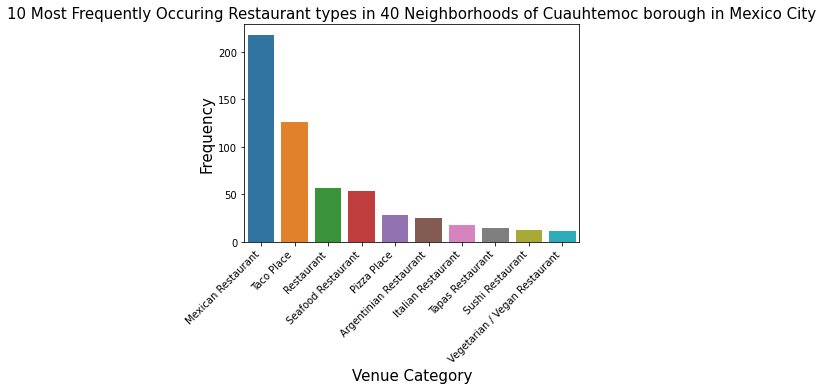

<Figure size 1296x504 with 0 Axes>

In [28]:
import seaborn as sns
from matplotlib import pyplot as plt

s=sns.barplot(x="Venue_Category", y="Frequency", data=Cuauhtemoc_Venues_Top10)
s.set_xticklabels(s.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('10 Most Frequently Occuring Restaurant types in 40 Neighborhoods of Cuauhtemoc borough in Mexico City', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_Freq_Venues1.png", dpi=300)
fig = plt.figure(figsize=(18,7))
plt.show()

# 16.Get the number of venues that were returned for each neighborhood

In [29]:
print ("Shape of the Data-Frame with Venue Category only Restaurant: ", Cuauhtemoc_venues_only_restaurant.shape)
Cuauhtemoc_venues_only_restaurant

Shape of the Data-Frame with Venue Category only Restaurant:  (646, 7)


Neighborhood  Neighborhood Latitude  \
1                       Algarin                19.4053   
2                       Algarin                19.4053   
3                       Algarin                19.4053   
4                       Algarin                19.4053   
5                       Algarin                19.4053   
6                       Algarin                19.4053   
7                       Algarin                19.4053   
8                       Algarin                19.4053   
9                       Algarin                19.4053   
10                      Algarin                19.4053   
11                      Algarin                19.4053   
12          Ampliación Asturias                19.4070   
13          Ampliación Asturias                19.4070   
14          Ampliación Asturias                19.4070   
15          Ampliación Asturias                19.4070   
16          Ampliación Asturias                19.4070   
17          Ampliación Asturias                19.4070   
18          Ampliación Asturias                19.4070   
19          Ampliación Asturias                19.4070   
20                     Asturias                19.4039   
21                     Asturias                19.4039   
22                     Asturias                19.4039   
23                     Asturias                19.4039   
24                     Asturias                19.4039   
25                     Asturias                19.4039   
26                     Asturias                19.4039   
27                     Asturias                19.4039   
28                     Asturias                19.4039   
29                      Atlampa                19.4581   
30                      Atlampa                19.4581   
31                      Atlampa                19.4581   
32                      Atlampa                19.4581   
33                      Atlampa                19.4581   
34                   Buenavista                19.4456   
35                   Buenavista                19.4456   
36                   Buenavista                19.4456   
37                   Buenavista                19.4456   
38                   Buenavista                19.4456   
39                   Buenavista                19.4456   
40                   Buenavista                19.4456   
41                   Buenavista                19.4456   
42                   Buenavista                19.4456   
43                   Buenavista                19.4456   
44                   Buenavista                19.4456   
45                   Buenavista                19.4456   
46                   Buenavista                19.4456   
47                 Buenos Aires                19.4054   
48                 Buenos Aires                19.4054   
49                 Buenos Aires                19.4054   
50              Centro (Área 1)                19.4303   
51              Centro (Área 1)                19.4303   
52              Centro (Área 1)                19.4303   
53              Centro (Área 1)                19.4303   
54              Centro (Área 1)                19.4303   
55              Centro (Área 1)                19.4303   
56              Centro (Área 1)                19.4303   
57              Centro (Área 1)                19.4303   
58              Centro (Área 1)                19.4303   
59              Centro (Área 1)                19.4303   
60              Centro (Área 1)                19.4303   
61              Centro (Área 1)                19.4303   
62              Centro (Área 1)                19.4303   
63              Centro (Área 1)                19.4303   
64              Centro (Área 1)                19.4303   
65              Centro (Área 1)                19.4303   
66              Centro (Área 1)                19.4303   
67              Centro (Área 1)                19.4303   
68              Centro (Área 1)                19.4303   
69              C

In [30]:
Cuauhtemoc_venues_restaurant = Cuauhtemoc_venues_only_restaurant.groupby(['Neighborhood'])['Venue Category'].apply(lambda x: x[x.str.contains('Restaurant|Pizza|Taco|BBQ|Bistro')].count())

In [31]:
Cuauhtemoc_venues_restaurant

Neighborhood
Algarin                       10
Ampliación Asturias            8
Asturias                       9
Atlampa                        5
Buenavista                    13
Buenos Aires                   3
Centro (Área 1)               23
Centro (Área 2)               23
Centro (Área 3)               10
Centro (Área 4)                8
Centro (Área 5)               24
Centro (Área 6)               15
Centro (Área 7)               37
Centro (Área 8)               11
Centro (Área 9)               17
Condesa                       26
Cuauhtémoc                    34
Doctores                       7
Esperanza                     11
Ex-Hipódromo de Peralvillo     5
Felipe Pescador                8
Guerrero                      23
Hipódromo                     26
Hipódromo Condesa             26
Juárez                        33
Maza                          11
Morelos, Plan Tepito          15
Nonoalco Tlatelolco            8
Obrera                        11
Paulino Navarro               

# 17. Find how many unique categories can be curated from all the returned venues

In [32]:
print('There are {} unique categories.'.format(len(Cuauhtemoc_venues_only_restaurant['Venue Category'].unique())))

There are 31 unique categories.


# 18. Analyze Each Neighborhood in Cuauhtemoc borough

In [33]:
# one hot encoding
Cuauhtemoc_onehot = pd.get_dummies(Cuauhtemoc_venues_only_restaurant[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Cuauhtemoc_onehot['Neighborhood'] = Cuauhtemoc_venues_only_restaurant['Neighborhood'] 

# define a list of column names
cols = Cuauhtemoc_onehot.columns.tolist()
cols

# move the column name to the beggining
cols.insert(0, cols.pop(cols.index('Neighborhood')))
cols

#then use .reindex() function to reorder
Cuauhtemoc_onehot = Cuauhtemoc_onehot.reindex(columns= cols)

#check result
Cuauhtemoc_onehot.head(500)

Neighborhood  American Restaurant  Argentinian Restaurant  \
1                       Algarin                    0                       0   
2                       Algarin                    0                       0   
3                       Algarin                    0                       0   
4                       Algarin                    0                       0   
5                       Algarin                    0                       0   
6                       Algarin                    0                       0   
7                       Algarin                    0                       0   
8                       Algarin                    0                       0   
9                       Algarin                    0                       0   
10                      Algarin                    0                       0   
11                      Algarin                    0                       0   
12          Ampliación Asturias                    0                       0   
13          Ampliación Asturias                    0                       0   
14          Ampliación Asturias                    0                       0   
15          Ampliación Asturias                    0                       1   
16          Ampliación Asturias                    0                       0   
17          Ampliación Asturias                    0                       0   
18          Ampliación Asturias                    0                       0   
19          Ampliación Asturias                    0                       0   
20                     Asturias                    0                       0   
21                     Asturias                    0                       1   
22                     Asturias                    0                       0   
23                     Asturias                    0                       0   
24                     Asturias                    0                       0   
25                     Asturias                    0                       0   
26                     Asturias                    0                       0   
27                     Asturias                    0                       0   
28                     Asturias                    0                       0   
29                      Atlampa                    0                       0   
30                      Atlampa                    0                       0   
31                      Atlampa                    0                       0   
32                      Atlampa                    0                       0   
33                      Atlampa                    0                       0   
34                   Buenavista                    0                       0   
35                   Buenavista                    0                       0   
36                   Buenavista                    0                       0   
37                   Buenavista                    0                       0   
38                   Buenavista                    0                       0   
39                   Buenavista                    1                       0   
40                   Buenavista                    0                       0   
41                   Buenavista                    0                       0   
42                   Buenavista                    0                       0   
43                   Buenavista                    0                       0   
44                   Buenavista                    0                       0   
45                   Buenavista                    0                       0   
46                   Buenavista                    0                       0   
47                 Buenos Aires                    0                       1   
48                 Buenos Aires                    0                       0   
49                 Buenos Aires                    0                       0   
50              Cen

# 19. Get the new dataframe size.

In [34]:
Cuauhtemoc_onehot.shape

(646, 32)

# 20. Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [35]:
Cuauhtemoc_grouped = Cuauhtemoc_onehot.groupby('Neighborhood').mean().reset_index()
Cuauhtemoc_grouped

Neighborhood  American Restaurant  Argentinian Restaurant  \
0                      Algarin             0.000000                0.000000   
1          Ampliación Asturias             0.000000                0.125000   
2                     Asturias             0.000000                0.111111   
3                      Atlampa             0.000000                0.000000   
4                   Buenavista             0.076923                0.000000   
5                 Buenos Aires             0.000000                0.333333   
6              Centro (Área 1)             0.000000                0.043478   
7              Centro (Área 2)             0.000000                0.043478   
8              Centro (Área 3)             0.000000                0.000000   
9              Centro (Área 4)             0.000000                0.125000   
10             Centro (Área 5)             0.000000                0.041667   
11             Centro (Área 6)             0.000000                0.000000   
12             Centro (Área 7)             0.000000                0.054054   
13             Centro (Área 8)             0.000000                0.000000   
14             Centro (Área 9)             0.000000                0.055556   
15                     Condesa             0.000000                0.076923   
16                  Cuauhtémoc             0.000000                0.000000   
17                    Doctores             0.000000                0.000000   
18                   Esperanza             0.000000                0.000000   
19  Ex-Hipódromo de Peralvillo             0.000000                0.000000   
20             Felipe Pescador             0.000000                0.000000   
21                    Guerrero             0.000000                0.000000   
22                   Hipódromo             0.000000                0.076923   
23           Hipódromo Condesa             0.000000                0.076923   
24                      Juárez             0.000000                0.060606   
25                        Maza             0.000000                0.000000   
26        Morelos, Plan Tepito             0.000000                0.000000   
27         Nonoalco Tlatelolco             0.000000                0.000000   
28                      Obrera             0.000000                0.000000   
29             Paulino Navarro             0.000000                0.090909   
30                  Peralvillo             0.000000                0.000000   
31                  Roma Norte             0.000000                0.000000   
32                    Roma Sur             0.000000                0.125000   
33                  San Rafael             0.000000                0.000000   
34         San Simón Tolnáhuac             0.000000                0.000000   
35     Santa María Insurgentes             0.000000                0.000000   
36       Santa María la Ribera             0.000000                0.000000   
37                  Tabacalera             0.000000                0.083333   
38                    Tránsito             0.000000                0.066667   
39                 Valle Gómez             0.000000                0.000000   
40                Vista Alegre             0.000000                0.050000   

    Asian Restaurant  BBQ Joint    Bistro  Chinese Restaurant  \
0           0.000000   0.000000  0.000000            0.000000   
1           0.000000   0.000000  0.000000            0.000000   
2           0.000000   0.111111  0.000000            0.000000   
3           0.000000   0.000000  0.000000            0.000000   
4           0.000000   0.000000  0.000000            0.076923   
5           0.000000   0.000000  0.000000            0.000000   
6           0.000000   0.000000  0.000000            0.000000   
7           0.000000   0.000000  0.000000            0.000000   
8           0.000000   0.000000  0.000000            0.000000   
9           0.000000   0.000000  0.000000        

# 21. Get size of the new dataframe

In [36]:
Cuauhtemoc_grouped.shape

(41, 32)

# 22. Show each neighborhood along with the top 10 most common venues

In [37]:
num_top_venues = 10

for hood in Cuauhtemoc_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Cuauhtemoc_grouped[Cuauhtemoc_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Algarin----
                             venue  freq
0               Mexican Restaurant  0.55
1                       Taco Place  0.36
2                       Steakhouse  0.09
3              American Restaurant  0.00
4          New American Restaurant  0.00
5                 Tapas Restaurant  0.00
6                 Sushi Restaurant  0.00
7               Spanish Restaurant  0.00
8  Southern / Soul Food Restaurant  0.00
9        South American Restaurant  0.00


----Ampliación Asturias----
                           venue  freq
0                     Taco Place  0.38
1             Mexican Restaurant  0.25
2  Vegetarian / Vegan Restaurant  0.12
3                     Restaurant  0.12
4         Argentinian Restaurant  0.12
5            Peruvian Restaurant  0.00
6               Tapas Restaurant  0.00
7               Sushi Restaurant  0.00
8                     Steakhouse  0.00
9             Spanish Restaurant  0.00


----Asturias----
                           venue  freq
0             Me

# 23. Store the previous information in a pandas_ dataframe

## 23a. First, let's write a function to sort the venues in descending order.

In [38]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

## 23b. Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [39]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Cuauhtemoc_grouped['Neighborhood']

for ind in np.arange(Cuauhtemoc_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Cuauhtemoc_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(50)

Neighborhood 1st Most Common Venue  \
0                      Algarin    Mexican Restaurant   
1          Ampliación Asturias            Taco Place   
2                     Asturias    Mexican Restaurant   
3                      Atlampa    Mexican Restaurant   
4                   Buenavista    Mexican Restaurant   
5                 Buenos Aires    Mexican Restaurant   
6              Centro (Área 1)    Mexican Restaurant   
7              Centro (Área 2)    Mexican Restaurant   
8              Centro (Área 3)    Mexican Restaurant   
9              Centro (Área 4)    Mexican Restaurant   
10             Centro (Área 5)    Mexican Restaurant   
11             Centro (Área 6)            Restaurant   
12             Centro (Área 7)    Mexican Restaurant   
13             Centro (Área 8)    Mexican Restaurant   
14             Centro (Área 9)    Mexican Restaurant   
15                     Condesa    Mexican Restaurant   
16                  Cuauhtémoc    Mexican Restaurant   
17                    Doctores    Mexican Restaurant   
18                   Esperanza    Seafood Restaurant   
19  Ex-Hipódromo de Peralvillo    Mexican Restaurant   
20             Felipe Pescador            Taco Place   
21                    Guerrero    Mexican Restaurant   
22                   Hipódromo    Mexican Restaurant   
23           Hipódromo Condesa    Mexican Restaurant   
24                      Juárez    Mexican Restaurant   
25                        Maza    Mexican Restaurant   
26        Morelos, Plan Tepito            Taco Place   
27         Nonoalco Tlatelolco    Mexican Restaurant   
28                      Obrera            Taco Place   
29             Paulino Navarro    Mexican Restaurant   
30                  Peralvillo    Mexican Restaurant   
31                  Roma Norte    Seafood Restaurant   
32                    Roma Sur    Mexican Restaurant   
33                  San Rafael    Mexican Restaurant   
34         San Simón Tolnáhuac    Mexican Restaurant   
35     Santa María Insurgentes    Mexican Restaurant   
36       Santa María la Ribera    Mexican Restaurant   
37                  Tabacalera            Taco Place   
38                    Tránsito    Mexican Restaurant   
39                 Valle Gómez            Taco Place   
40                Vista Alegre    Mexican Restaurant   

            2nd Most Common Venue          3rd Most Common Venue  \
0                      Taco Place                     Steakhouse   
1              Mexican Restaurant                     Restaurant   
2   Vegetarian / Vegan Restaurant                     Taco Place   
3                      Taco Place  Vegetarian / Vegan Restaurant   
4                      Taco Place                     Restaurant   
5          Argentinian Restaurant                    Pizza Place   
6                      Taco Place             Seafood Restaurant   
7                      Taco Place             Seafood Restaurant   
8                      Restaurant                     Taco Place   
9               German Restaurant         Argentinian Restaurant   
10                     Restaurant                     Taco Place   
11                     Taco Place             Mexican Restaurant   
12                     Taco Place  Vegetarian / Vegan Restaurant   
13               Tapas Restaurant                     Steakhouse   
14                     Taco Place             Seafood Restaurant   
15             Italian Restaurant                     Taco Place   
16                     Taco Place             Seafood Restaurant   
17                     Taco Place  Vegetarian / Vegan Restaurant   
18             Mexican Restaurant                     Taco Place   
19                    Pizza Place  Vegetarian / Vegan Restaurant   
20             Mexican Restaurant                     Restaurant   
21                     Taco Place             Seafood Restaurant   
22             Italian Restaurant                     Taco Place   
23             Italian Restaurant

# 24. Cluster Neighborhoods

## Run k-means to cluster the neighborhood into 5 clusters.

In [40]:
# set number of clusters
kclusters = 5

Cuauhtemoc_grouped_clustering = Cuauhtemoc_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Cuauhtemoc_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 1, 4, 3, 1, 0, 4, 4, 0, 2], dtype=int32)

# 25. Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [41]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Cuauhtemoc_merged = Cuauhtemoc_data

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
Cuauhtemoc_merged = Cuauhtemoc_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

Cuauhtemoc_merged.head(50) # check the last columns!

Postal Code     Borough                Neighborhood  Latitude  Longitude  \
0        06880  Cuauhtémoc                     Algarin   19.4053   -99.1408   
1        06890  Cuauhtémoc         Ampliación Asturias   19.4070   -99.1313   
2        06850  Cuauhtémoc                    Asturias   19.4039   -99.1308   
3        06450  Cuauhtémoc                     Atlampa   19.4581   -99.1562   
4        06350  Cuauhtémoc                  Buenavista   19.4456   -99.1507   
5        06780  Cuauhtémoc                Buenos Aires   19.4054   -99.1499   
6        06000  Cuauhtémoc             Centro (Área 1)   19.4303   -99.1373   
7        06010  Cuauhtémoc             Centro (Área 2)   19.4303   -99.1374   
8        06020  Cuauhtémoc             Centro (Área 3)   19.4396   -99.1322   
9        06040  Cuauhtémoc             Centro (Área 4)   19.4270   -99.1520   
10       06050  Cuauhtémoc             Centro (Área 5)   19.4336   -99.1435   
11       06060  Cuauhtémoc             Centro (Área 6)   19.4349   -99.1314   
12       06070  Cuauhtémoc             Centro (Área 7)   19.4296   -99.1458   
13       06080  Cuauhtémoc             Centro (Área 8)   19.4243   -99.1368   
14       06090  Cuauhtémoc             Centro (Área 9)   19.4270   -99.1325   
15       06140  Cuauhtémoc                     Condesa   19.4121   -99.1795   
16       06500  Cuauhtémoc                  Cuauhtémoc   19.4451   -99.1461   
17       06720  Cuauhtémoc                    Doctores   19.4165   -99.1493   
18       06840  Cuauhtémoc                   Esperanza   19.4201   -99.1286   
19       06250  Cuauhtémoc  Ex-Hipódromo de Peralvillo   19.4563   -99.1347   
20       06280  Cuauhtémoc             Felipe Pescador   19.4541   -99.1253   
21       06300  Cuauhtémoc                    Guerrero   19.4441   -99.1435   
22       06100  Cuauhtémoc                   Hipódromo   19.4121   -99.1795   
23       06170  Cuauhtémoc           Hipódromo Condesa   19.4121   -99.1795   
24       06600  Cuauhtémoc                      Juárez   19.4318   -99.1449   
25       06270  Cuauhtémoc                        Maza   19.4547   -99.1279   
26       06200  Cuauhtémoc        Morelos, Plan Tepito   19.4470   -99.1256   
27       06900  Cuauhtémoc         Nonoalco Tlatelolco   19.4532   -99.1424   
28       06800  Cuauhtémoc                      Obrera   19.4152   -99.1392   
29       06870  Cuauhtémoc             Paulino Navarro   19.4117   -99.1301   
30       06220  Cuauhtémoc                  Peralvillo   19.4620   -99.1342   
31       06700  Cuauhtémoc                  Roma Norte   19.4181   -99.1634   
32       06760  Cuauhtémoc                    Roma Sur   19.4058   -99.1626   
33       06470  Cuauhtémoc                  San Rafael   19.4556   -99.1550   
34       06920  Cuauhtémoc         San Simón Tolnáhuac   19.4590   -99.1431   
35       06430  Cuauhtémoc     Santa María Insurgentes   19.4615   -99.1489   
36       06400  Cuauhtémoc       Santa María la Ribera   19.4471   -99.1599   
37       06030  Cuauhtémoc                  Tabacalera   19.4364   -99.1553   
38       06820  Cuauhtémoc                    Tránsito   19.4174   -99.1319   
39       06240  Cuauhtémoc                 Valle Gómez   19.4579   -99.1223   
40       06860  Cuauhtémoc                Vista Alegre   19.4100   -99.1332   

    Cluster Labels 1st Most Common Venue          2nd Most Common Venue  \
0                3    Mexican Restaurant                     Taco Place   
1                1            Taco Place             Mexican Restaurant   
2                4    Mexican Restaurant  Vegetarian / Vegan Restaurant   
3                3    Mexican Restaurant                     Taco Place   
4                1    Mexican Restaurant                     Taco Place   
5                0    Mexican Restaurant         Argentinian Restaurant   
6                4    Mexican Restaurant                     Taco Place   
7                4    Mexican Restaurant                     Taco Place   
8        

# 26. let's visualize the resulting clusters

In [42]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Cuauhtemoc_merged['Latitude'], Cuauhtemoc_merged['Longitude'], Cuauhtemoc_merged['Neighborhood'], Cuauhtemoc_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# 27. Examine Clusters

### Examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, you can then assign a name to each cluster

## Cluster 1 : This is a __ cluster

In [43]:
Cuauhtemoc_merged.loc[Cuauhtemoc_merged['Cluster Labels'] == 0, Cuauhtemoc_merged.columns[[0,2,3,4] + list(range(5, Cuauhtemoc_merged.shape[1]))]]

Postal Code           Neighborhood  Latitude  Longitude  Cluster Labels  \
5        06780           Buenos Aires   19.4054   -99.1499               0   
8        06020        Centro (Área 3)   19.4396   -99.1322               0   
11       06060        Centro (Área 6)   19.4349   -99.1314               0   
27       06900    Nonoalco Tlatelolco   19.4532   -99.1424               0   
34       06920    San Simón Tolnáhuac   19.4590   -99.1431               0   
36       06400  Santa María la Ribera   19.4471   -99.1599               0   

   1st Most Common Venue   2nd Most Common Venue 3rd Most Common Venue  \
5     Mexican Restaurant  Argentinian Restaurant           Pizza Place   
8     Mexican Restaurant              Restaurant            Taco Place   
11            Restaurant              Taco Place    Mexican Restaurant   
27    Mexican Restaurant             Pizza Place            Restaurant   
34    Mexican Restaurant              Taco Place            Restaurant   
36    Mexican Restaurant             Pizza Place            Restaurant   

            4th Most Common Venue 5th Most Common Venue  \
5   Vegetarian / Vegan Restaurant      Asian Restaurant   
8                     Pizza Place  Fast Food Restaurant   
11             Italian Restaurant           Pizza Place   
27                     Taco Place      Sushi Restaurant   
34                    Pizza Place      Sushi Restaurant   
36             Italian Restaurant   Japanese Restaurant   

            6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
5                       BBQ Joint                Bistro    Chinese Restaurant   
8              Italian Restaurant     Indian Restaurant      Greek Restaurant   
11             Seafood Restaurant     Indian Restaurant      Greek Restaurant   
27  Vegetarian / Vegan Restaurant     Indian Restaurant      Greek Restaurant   
34  Vegetarian / Vegan Restaurant     Indian Restaurant      Greek Restaurant   
36             Russian Restaurant            Taco Place                Bistro   

      9th Most Common Venue         10th Most Common Venue  
5   Comfort Food Restaurant           Fast Food Restaurant  
8         German Restaurant  Vegetarian / Vegan Restaurant  
11        German Restaurant           Fast Food Restaurant  
27        German Restaurant           Fast Food Restaurant  
34        German Restaurant           Fast Food Restaurant  
36       Chinese Restaurant        Comfort Food Restaurant

## Cluster 2 This is the _____ Cluster

In [44]:
Cuauhtemoc_merged.loc[Cuauhtemoc_merged['Cluster Labels'] == 1, Cuauhtemoc_merged.columns[[0,2,3,4] + list(range(5, Cuauhtemoc_merged.shape[1]))]]

Postal Code          Neighborhood  Latitude  Longitude  Cluster Labels  \
1        06890   Ampliación Asturias   19.4070   -99.1313               1   
4        06350            Buenavista   19.4456   -99.1507               1   
16       06500            Cuauhtémoc   19.4451   -99.1461               1   
20       06280       Felipe Pescador   19.4541   -99.1253               1   
26       06200  Morelos, Plan Tepito   19.4470   -99.1256               1   
28       06800                Obrera   19.4152   -99.1392               1   
39       06240           Valle Gómez   19.4579   -99.1223               1   

   1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
1             Taco Place    Mexican Restaurant            Restaurant   
4     Mexican Restaurant            Taco Place            Restaurant   
16    Mexican Restaurant            Taco Place    Seafood Restaurant   
20            Taco Place    Mexican Restaurant            Restaurant   
26            Taco Place    Mexican Restaurant  Fast Food Restaurant   
28            Taco Place    Mexican Restaurant                Bistro   
39            Taco Place  Fast Food Restaurant    Chinese Restaurant   

            4th Most Common Venue   5th Most Common Venue  \
1   Vegetarian / Vegan Restaurant  Argentinian Restaurant   
4            Fast Food Restaurant     American Restaurant   
16                     Restaurant    Fast Food Restaurant   
20             Seafood Restaurant        Asian Restaurant   
26  Vegetarian / Vegan Restaurant  Argentinian Restaurant   
28             Seafood Restaurant        Asian Restaurant   
39                     Steakhouse      Mexican Restaurant   

     6th Most Common Venue   7th Most Common Venue 8th Most Common Venue  \
1         Asian Restaurant               BBQ Joint                Bistro   
4         Sushi Restaurant      Chinese Restaurant      Asian Restaurant   
16  Argentinian Restaurant        Asian Restaurant             BBQ Joint   
20               BBQ Joint                  Bistro    Chinese Restaurant   
26        Asian Restaurant               BBQ Joint                Bistro   
28               BBQ Joint  Argentinian Restaurant    Chinese Restaurant   
39        Asian Restaurant               BBQ Joint                Bistro   

       9th Most Common Venue    10th Most Common Venue  
1         Chinese Restaurant  Mediterranean Restaurant  
4                  BBQ Joint                    Bistro  
16                    Bistro        Chinese Restaurant  
20       Japanese Restaurant   Comfort Food Restaurant  
26        Chinese Restaurant   Comfort Food Restaurant  
28  Mediterranean Restaurant   Comfort Food Restaurant  
39  Mediterranean Restaurant   Comfort Food Restaurant

## Cluster 3 This is the _____ Cluster

In [45]:
Cuauhtemoc_merged.loc[Cuauhtemoc_merged['Cluster Labels'] == 2, Cuauhtemoc_merged.columns[[0,2,3,4] + list(range(5, Cuauhtemoc_merged.shape[1]))]]

Postal Code       Neighborhood  Latitude  Longitude  Cluster Labels  \
9        06040    Centro (Área 4)   19.4270   -99.1520               2   
15       06140            Condesa   19.4121   -99.1795               2   
22       06100          Hipódromo   19.4121   -99.1795               2   
23       06170  Hipódromo Condesa   19.4121   -99.1795               2   
31       06700         Roma Norte   19.4181   -99.1634               2   

   1st Most Common Venue 2nd Most Common Venue   3rd Most Common Venue  \
9     Mexican Restaurant     German Restaurant  Argentinian Restaurant   
15    Mexican Restaurant    Italian Restaurant              Taco Place   
22    Mexican Restaurant    Italian Restaurant              Taco Place   
23    Mexican Restaurant    Italian Restaurant              Taco Place   
31    Seafood Restaurant    Mexican Restaurant              Restaurant   

      4th Most Common Venue   5th Most Common Venue 6th Most Common Venue  \
9        Seafood Restaurant       Indian Restaurant    Italian Restaurant   
15         Sushi Restaurant  Argentinian Restaurant      Tapas Restaurant   
22         Sushi Restaurant  Argentinian Restaurant      Tapas Restaurant   
23         Sushi Restaurant  Argentinian Restaurant      Tapas Restaurant   
31  Comfort Food Restaurant      Italian Restaurant            Taco Place   

            7th Most Common Venue 8th Most Common Venue  \
9   Vegetarian / Vegan Restaurant      Asian Restaurant   
15       Mediterranean Restaurant            Restaurant   
22       Mediterranean Restaurant            Restaurant   
23       Mediterranean Restaurant            Restaurant   
31                         Bistro   Japanese Restaurant   

            9th Most Common Venue 10th Most Common Venue  
9                       BBQ Joint                 Bistro  
15        New American Restaurant            Pizza Place  
22        New American Restaurant            Pizza Place  
23        New American Restaurant            Pizza Place  
31  Vegetarian / Vegan Restaurant       Asian Restaurant

# Cluster 4 This is the _____ cluster¶

In [46]:
Cuauhtemoc_merged.loc[Cuauhtemoc_merged['Cluster Labels'] == 3, Cuauhtemoc_merged.columns[[0,2,3,4] + list(range(5, Cuauhtemoc_merged.shape[1]))]]

Postal Code                Neighborhood  Latitude  Longitude  \
0        06880                     Algarin   19.4053   -99.1408   
3        06450                     Atlampa   19.4581   -99.1562   
17       06720                    Doctores   19.4165   -99.1493   
19       06250  Ex-Hipódromo de Peralvillo   19.4563   -99.1347   
21       06300                    Guerrero   19.4441   -99.1435   
33       06470                  San Rafael   19.4556   -99.1550   
35       06430     Santa María Insurgentes   19.4615   -99.1489   

    Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
0                3    Mexican Restaurant            Taco Place   
3                3    Mexican Restaurant            Taco Place   
17               3    Mexican Restaurant            Taco Place   
19               3    Mexican Restaurant           Pizza Place   
21               3    Mexican Restaurant            Taco Place   
33               3    Mexican Restaurant            Restaurant   
35               3    Mexican Restaurant            Taco Place   

            3rd Most Common Venue   4th Most Common Venue  \
0                      Steakhouse    Fast Food Restaurant   
3   Vegetarian / Vegan Restaurant  Argentinian Restaurant   
17  Vegetarian / Vegan Restaurant  Argentinian Restaurant   
19  Vegetarian / Vegan Restaurant  Argentinian Restaurant   
21             Seafood Restaurant    Fast Food Restaurant   
33                     Taco Place        Ramen Restaurant   
35  Vegetarian / Vegan Restaurant  Argentinian Restaurant   

     5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
0      Japanese Restaurant    Italian Restaurant     Indian Restaurant   
3         Asian Restaurant             BBQ Joint                Bistro   
17        Asian Restaurant             BBQ Joint                Bistro   
19        Asian Restaurant             BBQ Joint                Bistro   
21  Argentinian Restaurant      Asian Restaurant             BBQ Joint   
33     Japanese Restaurant    Italian Restaurant     Indian Restaurant   
35        Asian Restaurant             BBQ Joint                Bistro   

   8th Most Common Venue    9th Most Common Venue  \
0       Greek Restaurant        German Restaurant   
3     Chinese Restaurant  Comfort Food Restaurant   
17    Chinese Restaurant  Comfort Food Restaurant   
19    Chinese Restaurant  Comfort Food Restaurant   
21                Bistro       Chinese Restaurant   
33      Greek Restaurant        German Restaurant   
35    Chinese Restaurant  Comfort Food Restaurant   

           10th Most Common Venue  
0   Vegetarian / Vegan Restaurant  
3            Fast Food Restaurant  
17           Fast Food Restaurant  
19           Fast Food Restaurant  
21       Mediterranean Restaurant  
33  Vegetarian / Vegan Restaurant  
35           Fast Food Restaurant

# Cluster 5: This is the ______ Cluster¶

In [47]:
Cuauhtemoc_merged.loc[Cuauhtemoc_merged['Cluster Labels'] == 4, Cuauhtemoc_merged.columns[[0,2,3,4] + list(range(5, Cuauhtemoc_merged.shape[1]))]]

Postal Code     Neighborhood  Latitude  Longitude  Cluster Labels  \
2        06850         Asturias   19.4039   -99.1308               4   
6        06000  Centro (Área 1)   19.4303   -99.1373               4   
7        06010  Centro (Área 2)   19.4303   -99.1374               4   
10       06050  Centro (Área 5)   19.4336   -99.1435               4   
12       06070  Centro (Área 7)   19.4296   -99.1458               4   
13       06080  Centro (Área 8)   19.4243   -99.1368               4   
14       06090  Centro (Área 9)   19.4270   -99.1325               4   
18       06840        Esperanza   19.4201   -99.1286               4   
24       06600           Juárez   19.4318   -99.1449               4   
25       06270             Maza   19.4547   -99.1279               4   
29       06870  Paulino Navarro   19.4117   -99.1301               4   
30       06220       Peralvillo   19.4620   -99.1342               4   
32       06760         Roma Sur   19.4058   -99.1626               4   
37       06030       Tabacalera   19.4364   -99.1553               4   
38       06820         Tránsito   19.4174   -99.1319               4   
40       06860     Vista Alegre   19.4100   -99.1332               4   

   1st Most Common Venue          2nd Most Common Venue  \
2     Mexican Restaurant  Vegetarian / Vegan Restaurant   
6     Mexican Restaurant                     Taco Place   
7     Mexican Restaurant                     Taco Place   
10    Mexican Restaurant                     Restaurant   
12    Mexican Restaurant                     Taco Place   
13    Mexican Restaurant               Tapas Restaurant   
14    Mexican Restaurant                     Taco Place   
18    Seafood Restaurant             Mexican Restaurant   
24    Mexican Restaurant                     Taco Place   
25    Mexican Restaurant                     Taco Place   
29    Mexican Restaurant                     Taco Place   
30    Mexican Restaurant             Seafood Restaurant   
32    Mexican Restaurant                     Taco Place   
37            Taco Place             Mexican Restaurant   
38    Mexican Restaurant             Seafood Restaurant   
40    Mexican Restaurant                     Taco Place   

            3rd Most Common Venue   4th Most Common Venue  \
2                      Taco Place  Argentinian Restaurant   
6              Seafood Restaurant              Restaurant   
7              Seafood Restaurant              Restaurant   
10                     Taco Place      Seafood Restaurant   
12  Vegetarian / Vegan Restaurant      Seafood Restaurant   
13                     Steakhouse      Chinese Restaurant   
14             Seafood Restaurant             Pizza Place   
18                     Taco Place              Restaurant   
24             Seafood Restaurant              Restaurant   
25                     Restaurant      Seafood Restaurant   
29               Sushi Restaurant              Steakhouse   
30                     Restaurant              Taco Place   
32                     Restaurant  Argentinian Restaurant   
37                     Restaurant  Argentinian Restaurant   
38                     Taco Place        Sushi Restaurant   
40                    Pizza Place      Seafood Restaurant   

            5th Most Common Venue          6th Most Common Venue  \
2                       BBQ Joint           Fast Food Restaurant   
6              Spanish Restaurant         Argentinian Restaurant   
7              Spanish Restaurant         Argentinian Restaurant   
10  Vegetarian / Vegan Restaurant         Argentinian Restaurant   
12               Tapas Restaurant        Comfort Food Restaurant   
13             Seafood Restaurant                    Pizza Place   
14      Middle Eastern Restaurant         Argentinian Restaurant   
18         Argentinian Restaurant               Asian Restaurant   
24  Vegetarian / Vegan Restaurant         Argentinian Restaurant   
25               Asian Restaurant                      B